# Trabajo práctico integrador

**Nombre**: Fabian S.

## Primera Parte (Clase 1 y 2)

In [4]:
import numpy as np
import matplotlib.pyplot as plt 

### Primer ejercicio


In [5]:
#Function to calculate norm of vector with p >= 1
def vector_norm(vector_x,p):

    x_p=0
    for j in range(len(vector_x)):
        x_p += pow(abs(vector_x[j]), p)
        x_final = pow(x_p, 1/p)
    return  x_final

#Infinity norm
def norm_vector(vector_x, type):
    if type == "infinity":
        return abs(np.max(vector_x))
    elif type == "zero":    
        return np.count_nonzero(vector_x)
    raise ValueError ("Argumento no permitido") 

x_vector = np.random.random(10)
print(x_vector)
l = 5

vector_norm(x_vector, l)
#zero norm of vector
type = "zero"
norm_vector(x_vector, type )

#Infinite norm of vector
type = "infinity"
norm_vector(x_vector, type)

[0.80657438 0.87249721 0.69107761 0.68990125 0.83453118 0.61834601
 0.35006335 0.39148072 0.2551061  0.03189621]


0.87249721231106

### Segundo Ejercicio

In [6]:
truth = np.array([1,1,0,1,1,1,0,0,0,1])
prediction = np.array([1,1,1,1,0,0,1,1,0,0])

In [7]:
true_positive_rate = np.sum((truth)&(prediction))
print(f'La tasa de verdaderos positivos es', true_positive_rate)

La tasa de verdaderos positivos es 3


In [8]:
true_negative_rate = np.sum((truth == 0)&(prediction == 0))
print(f'La tasa de verdaderos negativos es', true_negative_rate)

La tasa de verdaderos negativos es 1


In [9]:
false_positive_rate = np.sum((truth==1)&(prediction==1))
print(f'La tasa de falsos negativos es:', false_positive_rate)

La tasa de falsos negativos es: 3


In [10]:
false_negative_rate = np.sum((truth==1)&(prediction==0))
print(f'La tasa de falsos negativos es:', false_negative_rate)

La tasa de falsos negativos es: 3


In [11]:
#Calculo de la precisión
precision = (true_positive_rate) / (true_positive_rate + false_positive_rate)
print(f'La precision calculada es:', precision)

La precision calculada es: 0.5


In [12]:
#Calculo de recall
recall =  (true_positive_rate) / (true_positive_rate + false_negative_rate)
print(f'El valor de recall calculado es:', recall)

El valor de recall calculado es: 0.5


In [13]:
#Calculo de accuracy
accuracy = (true_positive_rate + true_negative_rate) / (true_positive_rate + true_negative_rate + false_positive_rate + false_negative_rate)
print(f'El valor de la accuracy calculada es:', accuracy)

El valor de la accuracy calculada es: 0.4


### Tercer y Cuarto Ejercicio

Para este ejercicio vamos a considerar los siguientes datasets:

* [HAR](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) (Ejercicio 3)
* [MNIST](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) (Ejercicio 4)

1. Aplicar PCA (validar que se cumplan las condiciones), ¿Cuántas componentes necesitamos para explicar el 80% de la varianza?
2. Gráficar la variación acumulada para cada caso.
3. Utilizando [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Agrupar el dataset transformado (ejercicio de PCA) y agrupar en clusters de $k=6$ (ej 3) y $k=10$ (ej 4). Luego en ambos casos probar con $k=2$.
4. Graficar los resultados con los distintos k's usando las primeras dos componentes principales como ejes x,y.
5. Explique. ¿Cuál fue la ganancia de usar PCA en conjunto con k-means?

## Segunda Parte (Clase 3 y 4)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamiento de modelos de prueba
from sklearn.linear_model import LinearRegression

# Evaluación de modelos de prueba
from sklearn.metrics import mean_squared_error

# Crear datasets
from sklearn.datasets import make_regression

In [15]:
# Creamos un dataset de prueba
X, y = make_regression(n_samples = 1000,
                       n_features = 1,
                       noise = 2,
                       n_informative = 1,
                       random_state = 42)

new_data = np.append(X,y.reshape(-1,1),axis=1)
new_data.shape

(1000, 2)

In [16]:
import pandas as pd
df = pd.DataFrame(new_data)

new_col = []
i = 0
for col in df.columns:
    if i ==  len(df.columns) - 1:
        new_col.append("target")
    else :
        new_col.append("feature_" + str(i+1))
        
    i += 1
    
df.columns = new_col

df.head()

,feature_1,target
0,-1.758739,-30.118736
1,1.031845,14.526197
2,-0.487606,-10.119305
3,0.186454,1.700188
4,0.725767,12.345314


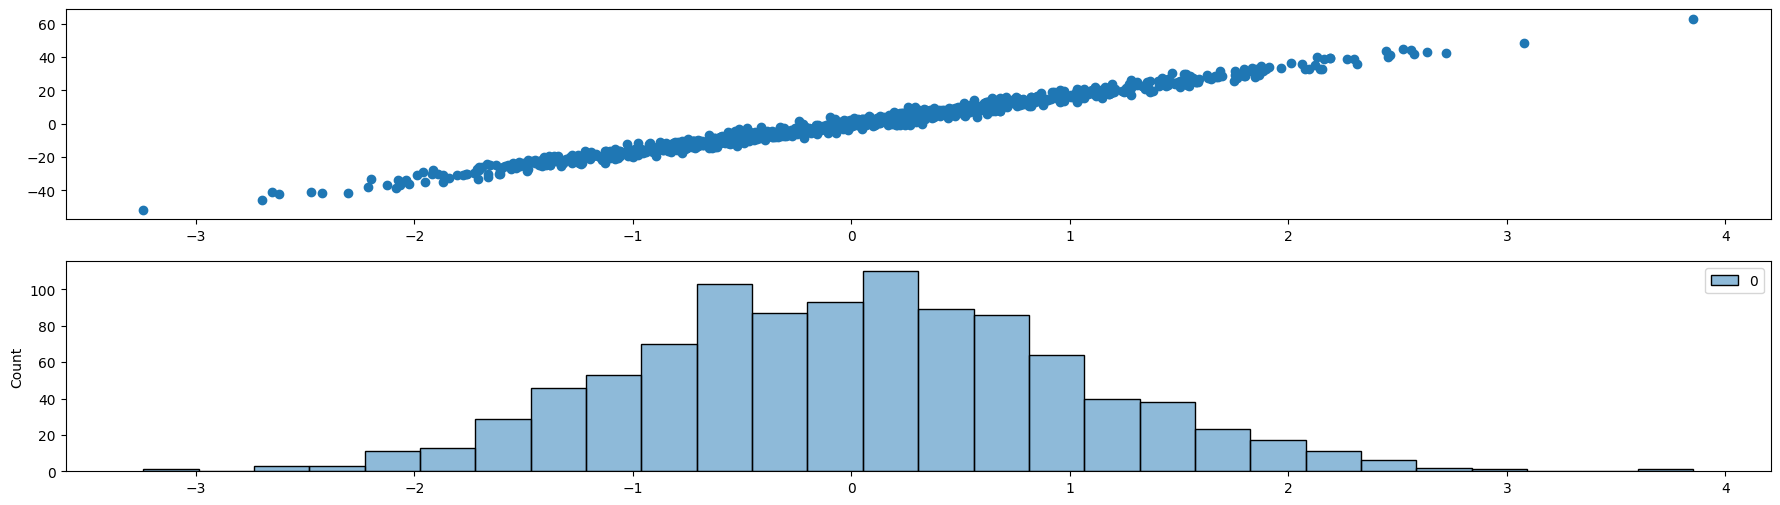

In [17]:
fig,axes = plt.subplots(2,figsize=(22,6))
axes[0].scatter(X,y)
sns.histplot(X, ax=axes[1]);

### Funciones auxiliares para generar datos anómalos

In [18]:
def generate_outliers(df: pd.DataFrame,
                     cols: list = None,
                     extreme_outlier: bool = False,
                     two_tailed: bool = False,
                     percentage: float = 0.02) -> pd.DataFrame:
  """Con esta función vamos a poder generar outliers en ciertas columnas de nuestro
  dataset. Si le damos True a _extreme_outlier_ va a generar outliers con mucho
  peso en la regresión (puede ser bilateral o unilateral segun _two_tailed_)
  """  
  seeds = np.random.randint(100, size = len(df))
  
  nsamples = np.math.floor(len(df) * percentage)
  idx_to_change = df.sample(n = nsamples).index

  cols = df.columns.tolist() if cols is None else cols

  result = df.copy(deep = True)
  
  for i,col_name in enumerate(cols):
    np.random.seed(seeds[i])

    iqr = result[col_name].quantile(0.75) - result[col_name].quantile(0.25)

    lb = result[col_name].quantile(0.25) - 1 * iqr
    ub = result[col_name].quantile(0.75) + 1 * iqr

    if two_tailed:
      outs = result[col_name].loc[(result[col_name] < lb) | (result[col_name] > ub)]
    else:
      outs = result[col_name].loc[(result[col_name] > ub)]
    
    out_size = len(outs)
    if out_size < nsamples:
      nsamples = out_size

    idx_to_change = outs.sample(nsamples, replace = False).index
    
    if extreme_outlier:
      outlier_sign = [1 if np.random.random() < 0.9 else -1 for _ in range(nsamples)]
      
      result[col_name].loc[idx_to_change] = np.multiply(outlier_sign,
                                                        np.random.uniform(low = result[col_name].mean(),
                                                                          high = result[col_name].max()*5,
                                                                          size = nsamples)
                                                        )
      result['target'].loc[idx_to_change] = np.multiply(outlier_sign,
                                                        np.random.uniform(low = result['target'].mean(),
                                                                          high = result['target'].max()*2,
                                                                          size = nsamples)
                                                        )
    else:
      samples = result[col_name].loc[idx_to_change].values
      np.random.shuffle(samples)
      result[col_name].loc[idx_to_change] = samples
  
  return result

In [19]:
df_outlier = generate_outliers(df,['feature_1'], percentage = 0.05, extreme_outlier = True, two_tailed= True)

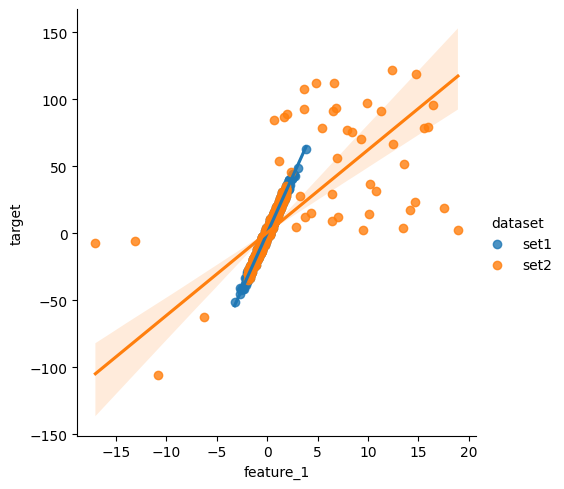

In [20]:
sns.lmplot(data = pd.concat([df.assign(dataset = 'set1'),
                                 df_outlier.assign(dataset = 'set2')]),
                x = 'feature_1',
                y = 'target',
                hue = 'dataset')

### Quinto ejercicio

Crear una función que separe los datos en train-validation-test 70-20-10


Hints: 

* Usar Indexing y slicing
* Usar np.random.[...]

In [21]:
import pandas as pd
#Generacion de datasets
df_generado = pd.DataFrame(np.random.randint(0,25, size=(25,5)), columns=['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Target'])
df_generado
df_generado.shape

(25, 5)

In [22]:
def split(df: pd.DataFrame):
    df_shuffled = df.sample(frac=1)
    #sp => Split factor
    sf_train = 0.7
    sf_test = 0.9

    X = df_shuffled[0:len(df_shuffled), :df_shuffled.shape[1]-1]
    Y = df_shuffled[0:len(df_shuffled), df_shuffled.shape[1]-1:]
    #Divide features and target
    X_train, X_test, X_val = X[0:int(sf_train*len(X))], X[int(sf_train*len(X)):int(sf_test*len(X))], X[int(sf_test*len(X)):]  
    Y_train, Y_test, Y_val = Y[0:int(sf_train*len(Y))], Y[int(sf_train*len(Y)):int(sf_test*len(Y))], Y[int(sf_test*len(Y)):]  

    return X_train, X_val, X_test, Y_train, Y_val, Y_test

### Sexto ejercicio

Utilizando la funcion `generate_outliers` generar puntos extremos dentro de los datos que generamos anteriormente. En este ejercicio dejar setteado `extreme_outliers` como `False` y observe como variando el porcentaje de los mismos la regresión comienza a afectarse.

Pasos:


1. Generar datasets:
    - Uno normal con poco `noise` y pocos outliers
    - Uno con mucho `noise` y pocos outliers
    - Uno con poco `noise` y muchos outliers
    - Uno con mucho `noise` y muchos outliers
2. Probar los distintos regresores a ver como se comportan frente a estos datasets anómalos.
3. Comparar y analizar resultados.

In [23]:
# Creamos un dataset de prueba
## Utilicen mas `n_features` > 1 y n_informative mas o menos la mitad de n_features
#Poco noise y pocos outliers
X_1, y_1 = make_regression(n_samples = 1000,
                       n_features = 10,
                       noise = 20,
                       n_informative = 5,
                       random_state = 42)


new_data = np.append(X_1,y_1.reshape(-1,1),axis=1)


df_1 = pd.DataFrame(new_data)


new_col = []
i = 0
for col in df_1.columns:
    if i ==  len(df_1.columns) - 1:
        new_col.append("target")
    else :
        new_col.append("feature_" + str(i+1))
       
    i += 1
   
df_1.columns = new_col

df_1.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target
0,0.123429,-1.253402,0.370340,0.101788,0.092628,-0.589254,0.306348,-1.458213,1.630130,1.242863,11.851066
1,-0.216827,0.214983,-0.028817,-1.701140,0.264482,0.314972,0.374062,-0.292758,0.501900,0.063702,-51.991638
2,0.388979,1.655407,-0.755792,-1.161784,-0.300860,1.048707,-0.283139,0.251474,-0.194269,-1.209477,-26.812546
3,0.219072,-0.251552,-1.095871,-0.806520,-0.435139,2.768374,1.677201,-0.475392,-0.835870,-1.314879,9.860582
4,0.715734,0.383168,-0.686715,-1.236136,0.731001,1.623885,1.254338,2.394362,2.185095,0.538435,-12.097448


In [24]:
df_outlier_1 = generate_outliers(df_1,['feature_1'], percentage = 0.1, extreme_outlier = True, two_tailed= True)

In [25]:
#Mucho noise y pocos outliers
X_2, y_2 = make_regression(n_samples = 1000,
                       n_features = 10,
                       noise = 200,
                       n_informative = 5,
                       random_state = 42)


new_data_two= np.append(X_2,y_2.reshape(-1,1),axis=1)


df_2 = pd.DataFrame(new_data_two)


new_col = []
i = 0
for col in df_2.columns:
    if i ==  len(df_2.columns) - 1:
        new_col.append("target")
    else :
        new_col.append("feature_" + str(i+1))
       
    i += 1
   
df_2.columns = new_col


df_2.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target
0,0.123429,-1.253402,0.370340,0.101788,0.092628,-0.589254,0.306348,-1.458213,1.630130,1.242863,-115.512955
1,-0.216827,0.214983,-0.028817,-1.701140,0.264482,0.314972,0.374062,-0.292758,0.501900,0.063702,28.497776
2,0.388979,1.655407,-0.755792,-1.161784,-0.300860,1.048707,-0.283139,0.251474,-0.194269,-1.209477,12.046927
3,0.219072,-0.251552,-1.095871,-0.806520,-0.435139,2.768374,1.677201,-0.475392,-0.835870,-1.314879,201.055018
4,0.715734,0.383168,-0.686715,-1.236136,0.731001,1.623885,1.254338,2.394362,2.185095,0.538435,-348.258956


In [26]:
df_outlier_2= generate_outliers(df_2,['feature_1', 'feature_2'], percentage = 0.01, extreme_outlier = True, two_tailed= True)

In [27]:
#Poco noise y muchos outliers
X_3, y_3 = make_regression(n_samples = 1000,
                       n_features = 10,
                       noise = 200,
                       n_informative = 5,
                       random_state = 42)


new_data_two= np.append(X_3,y_3.reshape(-1,1),axis=1)


df_3 = pd.DataFrame(new_data_two)

new_col = []
i = 0
for col in df_3.columns:
    if i ==  len(df_3.columns) - 1:
        new_col.append("target")
    else :
        new_col.append("feature_" + str(i+1))
       
    i += 1
   
df_3.columns = new_col


df_3.head()



,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target
0,0.123429,-1.253402,0.370340,0.101788,0.092628,-0.589254,0.306348,-1.458213,1.630130,1.242863,-115.512955
1,-0.216827,0.214983,-0.028817,-1.701140,0.264482,0.314972,0.374062,-0.292758,0.501900,0.063702,28.497776
2,0.388979,1.655407,-0.755792,-1.161784,-0.300860,1.048707,-0.283139,0.251474,-0.194269,-1.209477,12.046927
3,0.219072,-0.251552,-1.095871,-0.806520,-0.435139,2.768374,1.677201,-0.475392,-0.835870,-1.314879,201.055018
4,0.715734,0.383168,-0.686715,-1.236136,0.731001,1.623885,1.254338,2.394362,2.185095,0.538435,-348.258956


In [28]:
#Outliers
df_outlier_3= generate_outliers(df_3,['feature_1', 'feature_2'], percentage = 0.9, extreme_outlier = True, two_tailed= True)

In [29]:
#Mucho noise y muchos outliers
X_4, y_4 = make_regression(n_samples = 1000,
                       n_features = 10,
                       noise = 200,
                       n_informative = 5,
                       random_state = 42)


new_data_two= np.append(X_4,y_4.reshape(-1,1),axis=1)

df_4 = pd.DataFrame(new_data_two)


new_col = []
i = 0
for col in df_4.columns:
    if i ==  len(df_4.columns) - 1:
        new_col.append("target")
    else :
        new_col.append("feature_" + str(i+1))
       
    i += 1
   
df_4.columns = new_col


df_4.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target
0,0.123429,-1.253402,0.370340,0.101788,0.092628,-0.589254,0.306348,-1.458213,1.630130,1.242863,-115.512955
1,-0.216827,0.214983,-0.028817,-1.701140,0.264482,0.314972,0.374062,-0.292758,0.501900,0.063702,28.497776
2,0.388979,1.655407,-0.755792,-1.161784,-0.300860,1.048707,-0.283139,0.251474,-0.194269,-1.209477,12.046927
3,0.219072,-0.251552,-1.095871,-0.806520,-0.435139,2.768374,1.677201,-0.475392,-0.835870,-1.314879,201.055018
4,0.715734,0.383168,-0.686715,-1.236136,0.731001,1.623885,1.254338,2.394362,2.185095,0.538435,-348.258956


In [30]:
from sklearn.linear_model import LinearRegression, HuberRegressor, ElasticNet
from sklearn.metrics import r2_score

#Comparar con distintos niveles y outliers de la regresión

#Split the data into training(0.8) /testing sets (0.2)
X_1_train= df_outlier_1.iloc[:800,:-2] 
X_1_test = df_outlier_1.iloc[800:,:-2]

#Split the targets into train/testing sets
y_1_train = df_outlier_1.iloc[:800, -1]
y_1_test = df_outlier_1.iloc[800:, -1]

#Create linear regression objet
linear_regression = LinearRegression()

#Train the model using the training sets
linear_regression.fit(X_1_train, y_1_train)

#Make predictions using the testing test
y_pred = linear_regression.predict(X_1_test)

#The mean squared error
print("Mean squared error: %.3f"% mean_squared_error(y_1_test, y_pred))

#Create Hubert regressor object
huber = HuberRegressor()
huber.fit(X_1_train, y_1_train)

#Make predictios using the testing test
y_pred_hb = huber.predict(X_1_test)
print("Huber coefficients", huber.coef_)

#Create Elastinet regressor objet
alpha = 0.1
enet = ElasticNet(alpha = alpha, l1_ratio = 0.7)
enet.fit(X_1_train, y_1_train)
y_pred_enet = enet.predict(X_1_test)
r2_score_enet = r2_score(y_1_test, y_pred_enet)
print(r2_score_enet)

Mean squared error: 2039.849
Huber coefficients [50.8147417  -0.63714064 -0.32887015 31.90918762  6.63696484  1.68303693
 10.88823962  0.3061115  -1.73179992]
0.6248641874382087


In [31]:

#Split the data into training(0.8) /testing sets (0.2)
X_2_train= df_outlier_2.iloc[:800,:-2] 
X_2_test = df_outlier_2.iloc[800:,:-2]

#Split the targets into train/testing sets
y_2_train = df_outlier_2.iloc[:800, -1]
y_2_test = df_outlier_2.iloc[800:, -1]

#Create linear regression objet
linear_regression_2 = LinearRegression()

#Train the model using the training sets
linear_regression_2.fit(X_2_train, y_2_train)

#Make predictions using the testing test
y_2_pred = linear_regression.predict(X_2_test)

#The mean squared error
print("Mean squared error: %.3f"% mean_squared_error(y_2_test, y_2_pred))

#Create Hubert regressor object
huber_2 = HuberRegressor()
huber_2.fit(X_2_train, y_2_train)

#Make predictios using the testing test
y_2_pred_hb = huber.predict(X_2_test)
print("Huber coefficients", huber.coef_)

#Create Elastinet regressor objet
alpha = 0.1
enet = ElasticNet(alpha = alpha, l1_ratio = 0.7)
enet.fit(X_2_train, y_2_train)
y_2_pred_enet = enet.predict(X_2_test)
r2_score_enet = r2_score(y_2_test, y_2_pred_enet)
print(r2_score_enet)

Mean squared error: 56820.493
Huber coefficients [50.8147417  -0.63714064 -0.32887015 31.90918762  6.63696484  1.68303693
 10.88823962  0.3061115  -1.73179992]
0.18604860182030059


In [32]:

#Split the data into training(0.8) /testing sets (0.2)
X_3_train= df_outlier_3.iloc[:800,:-2] 
X_3_test = df_outlier_3.iloc[800:,:-2]

#Split the targets into train/testing sets
y_3_train = df_outlier_3.iloc[:800, -1]
y_3_test = df_outlier_3 .iloc[800:, -1]

#Create linear regression objet
linear_regression_3 = LinearRegression()

#Train the model using the training sets
linear_regression_3.fit(X_3_train, y_3_train)

#Make predictions using the testing test
y_3_pred = linear_regression.predict(X_3_test)

#The mean squared error
print("Mean squared error: %.3f"% mean_squared_error(y_3_test, y_3_pred))

#Create Hubert regressor object
huber_3 = HuberRegressor()
huber_3.fit(X_3_train, y_3_train)

#Make predictios using the testing test
y_3_pred_hb = huber.predict(X_3_test)
print("Huber coefficients", huber.coef_)

#Create Elastinet regressor objet
alpha = 0.1
enet_3 = ElasticNet(alpha = alpha, l1_ratio = 0.7)
enet_3.fit(X_3_train, y_3_train)
y_3_pred_enet = enet_3.predict(X_3_test)
r2_score_enet = r2_score(y_3_test, y_3_pred_enet)
print(r2_score_enet)

Mean squared error: 124334.686
Huber coefficients [50.8147417  -0.63714064 -0.32887015 31.90918762  6.63696484  1.68303693
 10.88823962  0.3061115  -1.73179992]
0.17932493069186162


## Tercera Parte (Clase 5, 6 y 7)

La ultima parte la van a poder encontrar en el archivo `template_tp_integrador_tercera_parte.ipynb`